In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization

In [56]:
def load_and_preprocess_image(file_path):
    img = plt.imread(file_path)
    if img.shape[-1] == 4:
        img = img[:,:,:3]
    img = cv2.resize(img,(224,224))
    img = img.reshape(1,224,224,3)
    return img

In [57]:
def y_label(data_list):
    y = []
    
    for val in data_list:
        if '종이류' in val:
            y.append(0)
        elif '플라스틱류' in val:
            y.append(1)
        elif '유리병' in val:
            y.append(2)
        elif '캔류' in val:
            y.append(3)
        elif '스티로폼' in val:
            y.append(4)
        elif '페트병' in val:
            y.append(5)
    return y

In [58]:
trash_dic = {
    0: '종이류',
    1: '플라스틱류',
    2: '유리병',
    3: '캔류',
    4: '스티로폼',
    5: '페트병'
}


In [59]:
def scailing(data_list):
    X = np.zeros((len(data_list), 224, 224, 3))
    for idx, file in enumerate(data_list):
        file = file.replace("\\","/")
        dt = plt.imread(file)
        if dt.shape[-1] == 4:
            dt = dt[:,:,:3]
        dt = cv2.resize(dt,(224,224))
        X[idx] = dt
    return X

In [60]:
def trash_predict(x):
    x_trans = vgg.predict(x)
    prediction = trash_dic.get(np.argmax(model.predict(x_trans)))
    print(f'예측값은 {prediction}입니다 !!!')
    plt.imshow(x[0])
    plt.show()

In [118]:
paper_list = glob('./train/trash_/*종이*/*/*/*.*')[:3000]
plastic_list = glob('./train/trash_/*플라스틱*/*/*/*.*')[:3000]
glass_list = glob('./train/trash_/*유리*/*/*/*.*')[:3000]
can_list = glob('./train/trash_/*캔*/*/*/*.*')[:3000]
styrofoam_list = glob('./train/trash_/*스티로폼*/*/*/*.*')[:3000] 
plastic_bottle_list = glob('./train/trash_/*페트병*/*/*/*.*')[:3000]

In [119]:
paper_list.extend(plastic_list)
paper_list.extend(glass_list)
paper_list.extend(can_list)
paper_list.extend(styrofoam_list)
paper_list.extend(plastic_bottle_list)

data = paper_list
len(data)

18000

In [120]:
y = np.array(y_label(data))
y = to_categorical(y)

In [121]:
X = scailing(data)

In [122]:
X_, X_test, y_, y_test = train_test_split(X,y,test_size=0.2) 

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X_,y_)

In [124]:
vgg = VGG16(include_top=False, input_shape=(224,224,3))

X_train_trans = vgg.predict(X_train)
X_val_trans = vgg.predict(X_val)

113/113 [==============================] - 173s 2s/step


In [125]:
model = Sequential([
    Flatten(input_shape=X_train_trans.shape[1:]),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(6, activation='softmax')
])

In [126]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               6422784   
                                                                 
 batch_normalization_16 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_17 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_22 (Dense)            (None, 64)               

In [127]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
X_val_trans.shape, y_val.shape, X_train_trans.shape, y_train.shape

((1200, 7, 7, 512), (1200, 6), (3600, 7, 7, 512), (3600, 6))

In [128]:
model.fit(X_train_trans, y_train, batch_size=128, epochs=20, validation_data=(X_val_trans, y_val))

Epoch 1/20
85/85 [==============================] - 8s 72ms/step - loss: 0.5672 - accuracy: 0.8174 - val_loss: 0.3891 - val_accuracy: 0.8789
Epoch 2/20
85/85 [==============================] - 6s 69ms/step - loss: 0.1555 - accuracy: 0.9578 - val_loss: 0.2921 - val_accuracy: 0.9061
Epoch 3/20
85/85 [==============================] - 6s 68ms/step - loss: 0.0545 - accuracy: 0.9884 - val_loss: 0.2714 - val_accuracy: 0.9136
Epoch 4/20
85/85 [==============================] - 6s 69ms/step - loss: 0.0239 - accuracy: 0.9951 - val_loss: 0.2953 - val_accuracy: 0.9119
Epoch 5/20
85/85 [==============================] - 6s 69ms/step - loss: 0.0137 - accuracy: 0.9981 - val_loss: 0.3019 - val_accuracy: 0.9164
Epoch 6/20
85/85 [==============================] - 6s 70ms/step - loss: 0.0129 - accuracy: 0.9980 - val_loss: 0.3160 - val_accuracy: 0.9089
Epoch 7/20
85/85 [==============================] - 6s 69ms/step - loss: 0.0136 - accuracy: 0.9971 - val_loss: 0.3624 - val_accuracy: 0.9008
Epoch 8/20
85

In [147]:
samples = glob('./train/trash_/*/*/*/*.*')
test = np.random.choice(samples,20)

1/1 [==============================] - 0s 23ms/step
예측값은 캔류입니다 !!!


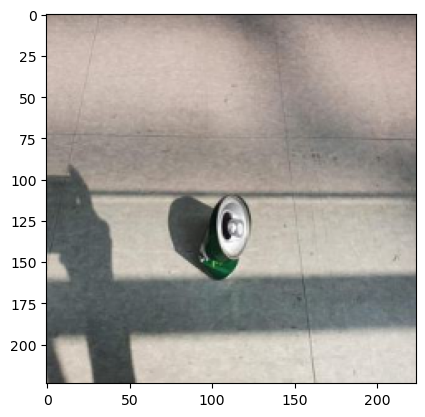

1/1 [==============================] - 0s 24ms/step
예측값은 플라스틱류입니다 !!!


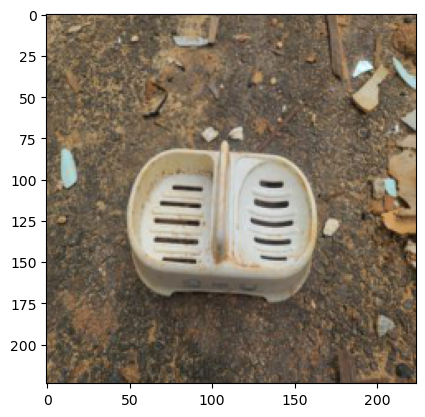

1/1 [==============================] - 0s 30ms/step
예측값은 스티로폼입니다 !!!


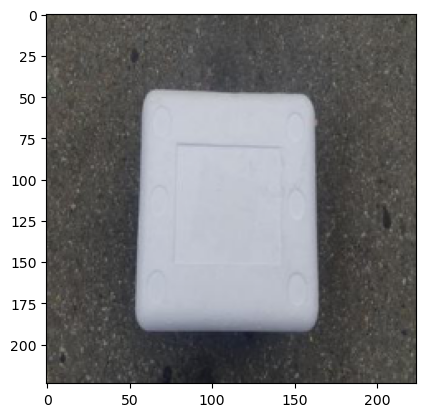

1/1 [==============================] - 0s 29ms/step
예측값은 플라스틱류입니다 !!!


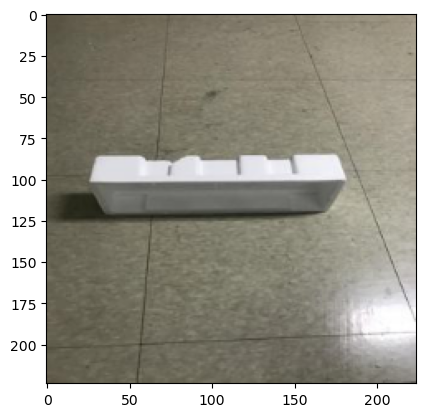

1/1 [==============================] - 0s 22ms/step
예측값은 플라스틱류입니다 !!!


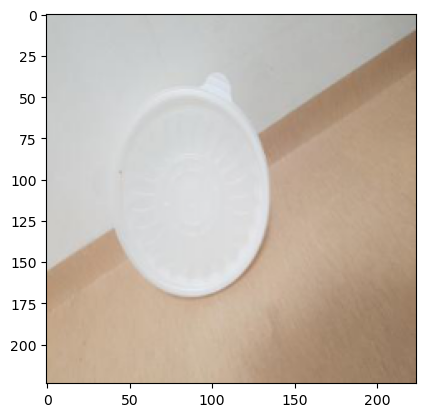

1/1 [==============================] - 0s 36ms/step
예측값은 플라스틱류입니다 !!!


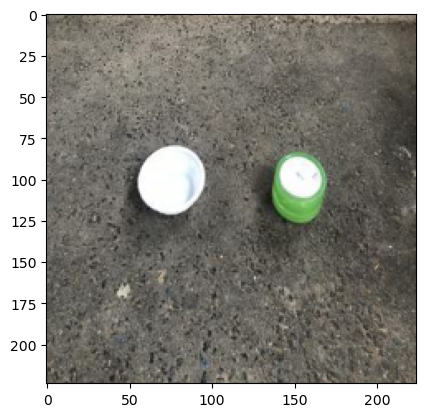

1/1 [==============================] - 0s 21ms/step
예측값은 캔류입니다 !!!


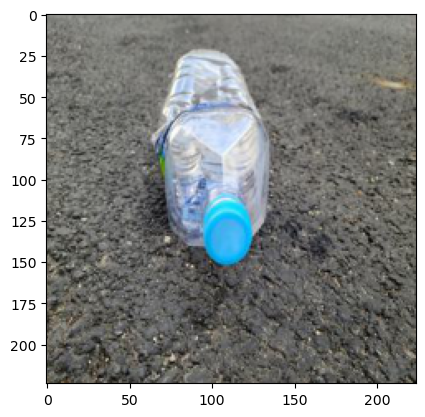

1/1 [==============================] - 0s 27ms/step
예측값은 페트병입니다 !!!


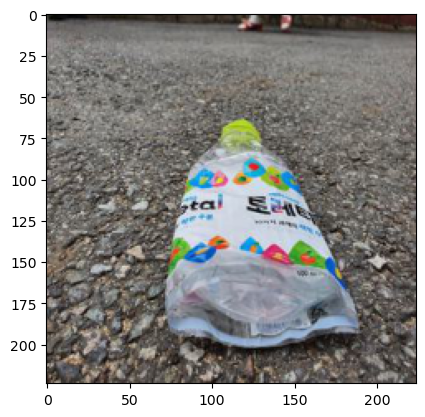

1/1 [==============================] - 0s 23ms/step
예측값은 플라스틱류입니다 !!!


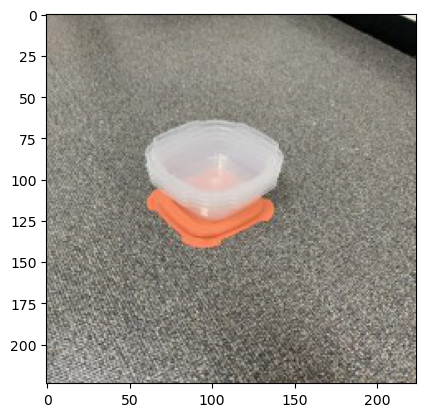

1/1 [==============================] - 0s 32ms/step
예측값은 종이류입니다 !!!


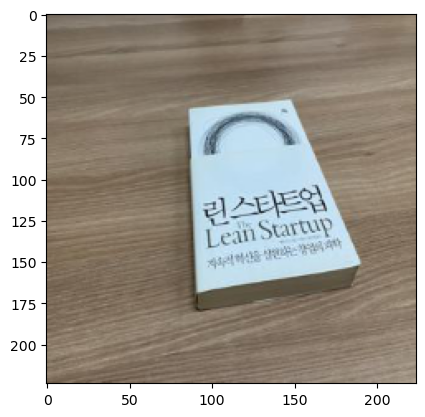

1/1 [==============================] - 0s 29ms/step
예측값은 캔류입니다 !!!


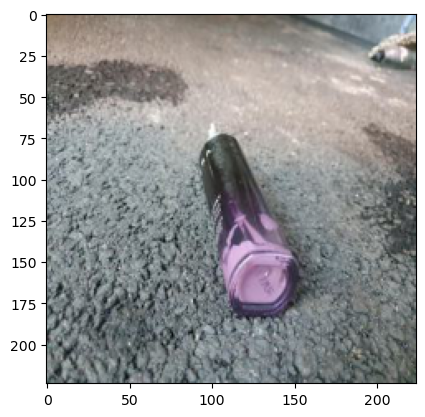

1/1 [==============================] - 0s 26ms/step
예측값은 종이류입니다 !!!


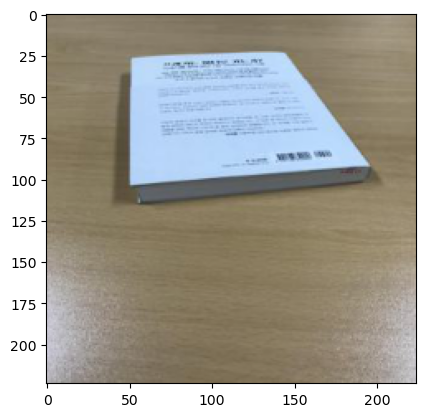

1/1 [==============================] - 0s 16ms/step
예측값은 캔류입니다 !!!


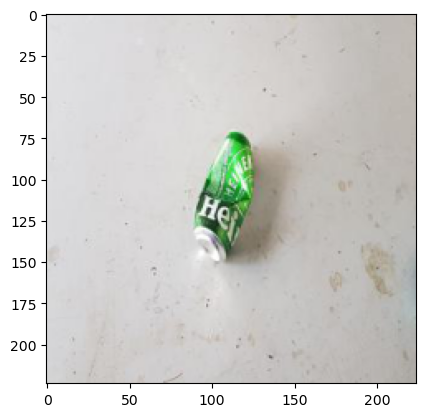

1/1 [==============================] - 0s 37ms/step
예측값은 플라스틱류입니다 !!!


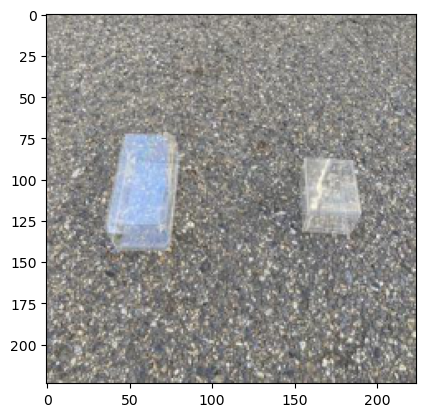

1/1 [==============================] - 0s 31ms/step
예측값은 종이류입니다 !!!


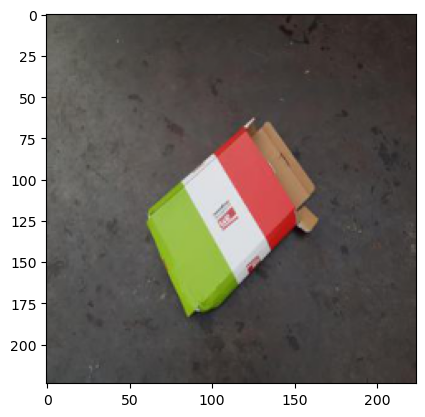

1/1 [==============================] - 0s 31ms/step
예측값은 캔류입니다 !!!


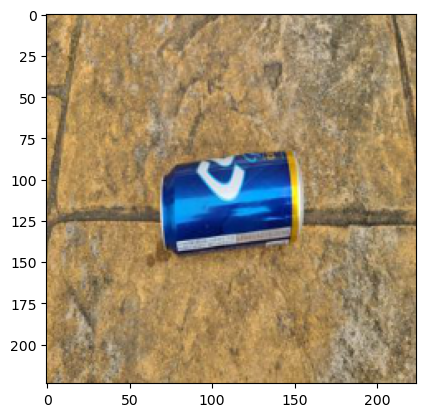

1/1 [==============================] - 0s 32ms/step
예측값은 페트병입니다 !!!


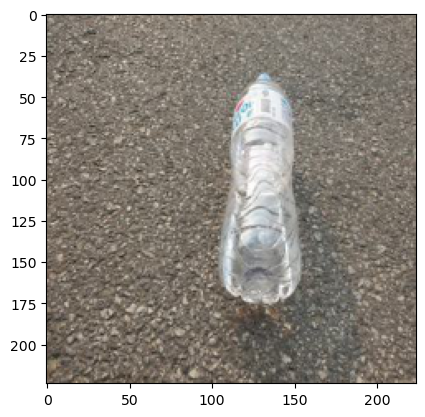

1/1 [==============================] - 0s 28ms/step
예측값은 종이류입니다 !!!


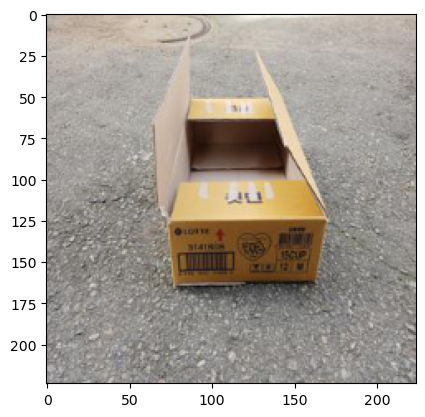

1/1 [==============================] - 0s 26ms/step
예측값은 종이류입니다 !!!


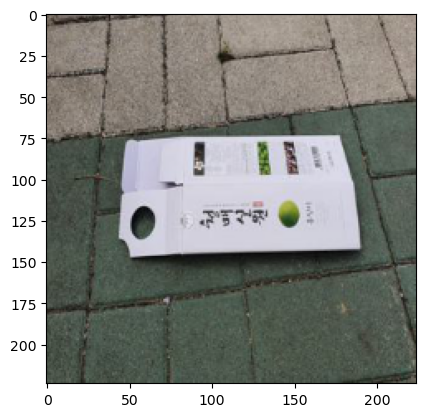

1/1 [==============================] - 0s 28ms/step
예측값은 플라스틱류입니다 !!!


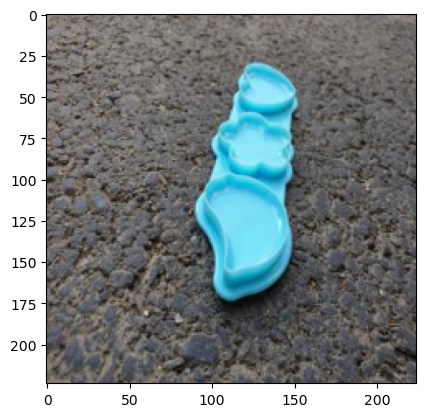

In [148]:
for file_path in test:
    img = load_and_preprocess_image(file_path)
    trash_predict(img)

In [91]:
def predict_image(file_path):
    img = load_and_preprocess_image(file_path)
    trash_predict(img)

1/1 [==============================] - 0s 35ms/step
예측값은 플라스틱류입니다 !!!


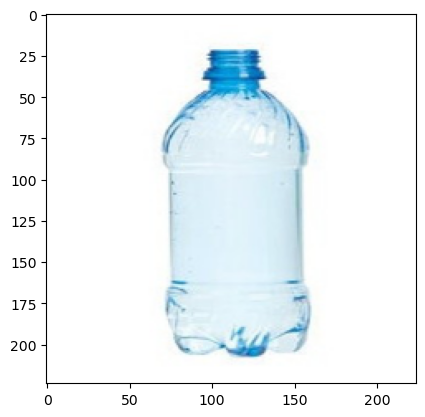

1/1 [==============================] - 0s 28ms/step
예측값은 스티로폼입니다 !!!


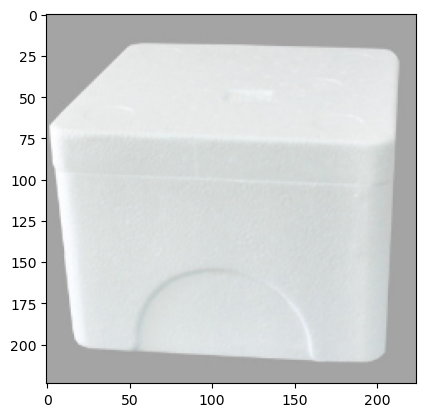

1/1 [==============================] - 0s 28ms/step
예측값은 스티로폼입니다 !!!


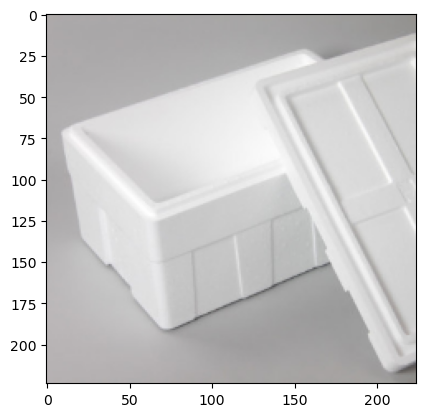

1/1 [==============================] - 0s 26ms/step
예측값은 캔류입니다 !!!


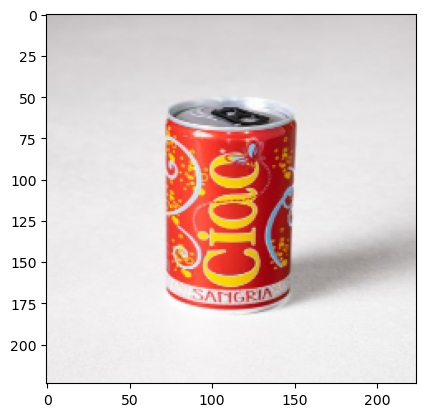

1/1 [==============================] - 0s 25ms/step
예측값은 유리병입니다 !!!


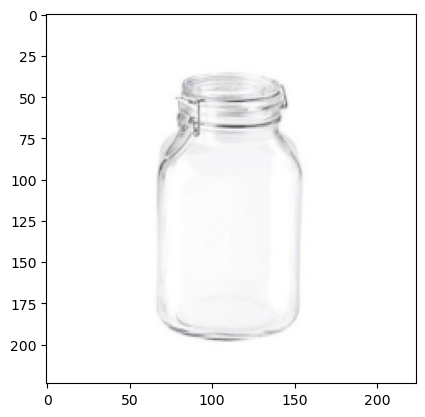

1/1 [==============================] - 0s 24ms/step
예측값은 종이류입니다 !!!


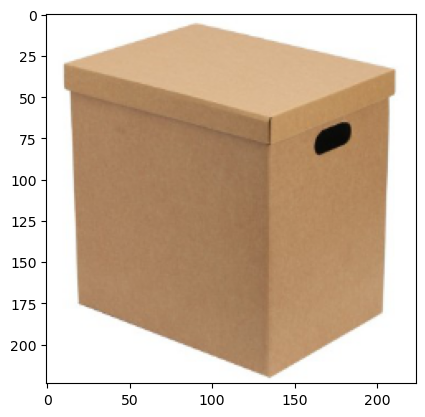

1/1 [==============================] - 0s 25ms/step
예측값은 플라스틱류입니다 !!!


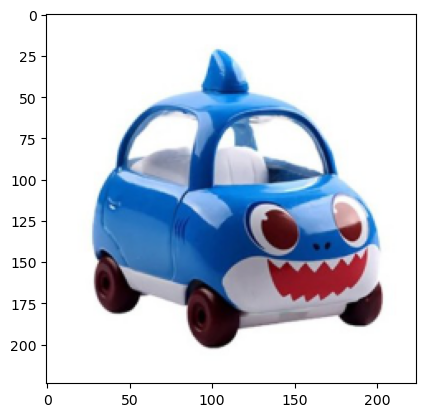

In [134]:
predict_image('./train/plast_bottle1.jpg')
predict_image('./train/styrofoam1.jpg')
predict_image('./train/styrofoam2.jpg')
predict_image('./train/can1.jpg')
predict_image('./train/glass1.jpg')
predict_image('./train/paper1.jpg')
predict_image('./train/plastic1.jpg')